# ***MNIST number recognization using keras***

## Importing required libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils
import tensorflow as tf

## Loading mnist dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_test.shape

(10000,)

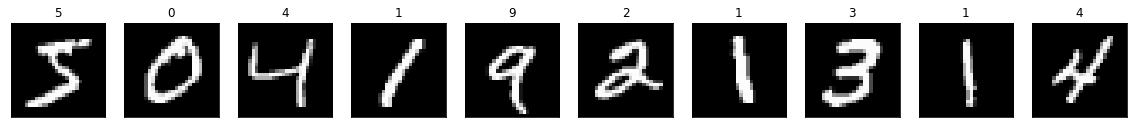

In [4]:
fig, axes = plt.subplots(ncols = 10, sharex = False, sharey = True, figsize = ( 20, 4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i], cmap = 'gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
y_test.shape

(10000, 10)

## Model Building

In [7]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='Softmax'))

In [8]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fa7e01deb90>>

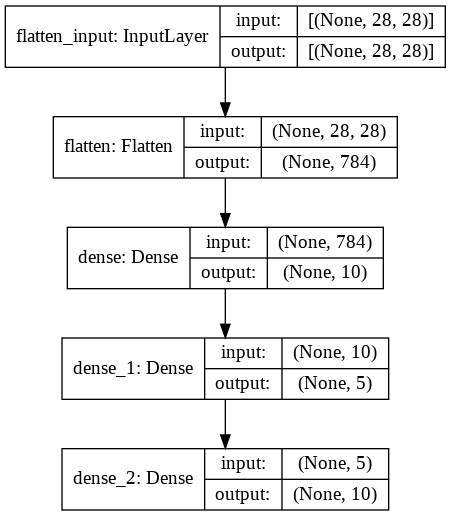

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes = True)

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

In [11]:
history = model.fit(x_train, y_train, epochs=29,
          validation_data = (x_test,y_test))

Epoch 1/29
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7791 - acc: 0.4013 - val_loss: 1.4816 - val_acc: 0.5013
Epoch 2/29
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2857 - acc: 0.5989 - val_loss: 1.1427 - val_acc: 0.6800
Epoch 3/29
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0643 - acc: 0.6865 - val_loss: 1.0422 - val_acc: 0.6807
Epoch 4/29
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9401 - acc: 0.7084 - val_loss: 0.9208 - val_acc: 0.7122
Epoch 5/29
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8267 - acc: 0.7449 - val_loss: 0.7463 - val_acc: 0.7736
Epoch 6/29
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7382 - acc: 0.7889 - val_loss: 0.6962 - val_acc: 0.8054
Epoch 7/29
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6962 - acc: 0.7950 - val_loss: 0.6596 - val_acc: 0.8197
Epoch 8/29
1875/1875 [==============================] - 3s 2ms

In [12]:
model.save('mnist_model.h5')

In [13]:
history.history

{'acc': [0.401283323764801,
  0.5989000201225281,
  0.6865333318710327,
  0.7083666920661926,
  0.7448999881744385,
  0.7889333367347717,
  0.7950000166893005,
  0.8244500160217285,
  0.8178166747093201,
  0.8226666450500488,
  0.8257499933242798,
  0.8282166719436646,
  0.8395833373069763,
  0.8347333073616028,
  0.840666651725769,
  0.8435333371162415,
  0.8275166749954224,
  0.8357666730880737,
  0.8423333168029785,
  0.8447999954223633,
  0.8513166904449463,
  0.852483332157135,
  0.8542500138282776,
  0.8478999733924866,
  0.8482166528701782,
  0.8410333395004272,
  0.8542666435241699,
  0.8546333312988281,
  0.8628833293914795],
 'loss': [1.7791179418563843,
  1.2857359647750854,
  1.0642999410629272,
  0.9401326775550842,
  0.8267258405685425,
  0.7382403016090393,
  0.6961995363235474,
  0.6386086344718933,
  0.6368512511253357,
  0.6326902508735657,
  0.6251626014709473,
  0.6031771302223206,
  0.5894345641136169,
  0.5998083353042603,
  0.5854344367980957,
  0.572608113288879

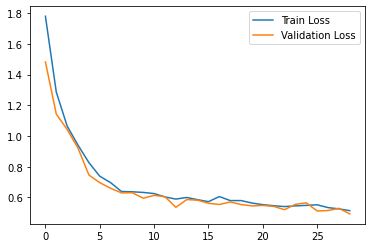

In [14]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

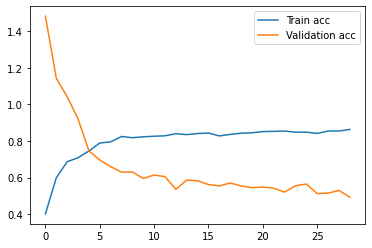

In [15]:
plt.plot(history.history['acc'], label = "Train acc")
plt.plot(history.history['val_loss'], label = "Validation acc")
plt.legend()
plt.show()

In [17]:
import keras
model = keras.models.load_model('mnist_model.h5')

# ***Lets make prediction for a image***

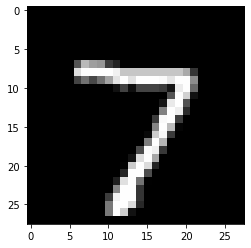

In [18]:
plt.imshow(x_test[0], cmap='gray')

In [21]:
x= np.reshape(x_test[0], (1,28,28))
np.argmax(model.predict(x))

7

great we got exact output for given image with our model.